# Describtion

Given a list of short text responses and a list of possible key phrases or group of key phrases with similar meaning. Assign key phrases or the group to relevant short text response. A key phrase can be assigned to multiple responses and similarly a response can be assigned multiple key phrases.



# Problem Statemtent

Find Similer keyphase in a corpus

# Constraints:
Has to understand the semantic relation between words and given keyphrase
No Latency Requirement

# Benefits:
Help to understand and transverse huge corpus



## Importing Liabraries

In [1]:
import numpy as np
import pandas as pd

## Loading dataset

In [2]:
fake_test = pd.read_csv('Fake.csv')    #reading fake csv
fake_test['label'] = 0 #Adding label: 0  to fake news
fake_test = fake_test[['text', 'label']]

In [3]:
true_test = pd.read_csv('True.csv')     #reading True.csv
true_test['label'] = 1 #Adding label: 1  to real news
true_test = true_test[['text', 'label']]

In [4]:
data = pd.concat([true_test, fake_test])       
data = data.sample(frac = 1)              # combining Fake and True in data

In [5]:
data.head(3) # Final Dataset

,text,label
8082,WASHINGTON (Reuters) - Democratic presidential...,1
19804,Notify the CDC. It's spreading. #BenCarson #Mo...,0
12972,Ahmad Rahami has been identified as a suspect ...,0


## Performing simple EDA

In [6]:
data.columns #Checking columns

Index(['text', 'label'], dtype='object')

In [7]:
data.isnull().sum() #Checking for null values

text     0
label    0
dtype: int64

In [8]:
data.isna().sum() #Checking for Nan values

text     0
label    0
dtype: int64

# Text Preproccesing

In [9]:
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

In [10]:
# DECONTRACTING 
# eg:  can't = can not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [11]:
# Defing Stopword Explictly
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [12]:
#Preprocessing the text

from tqdm import tqdm     #for process bar
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████| 44898/44898 [00:48<00:00, 925.32it/s]


In [13]:
#Appending processed text into DATA

data['text'] = preprocessed_text

data.drop('label',axis=1, inplace = True)

In [14]:
data.head(3)

,text
8082,washington reuters democratic presidential can...
19804,notify cdc spreading bencarson morningjoe trum...
12972,ahmad rahami identified suspect new york new j...


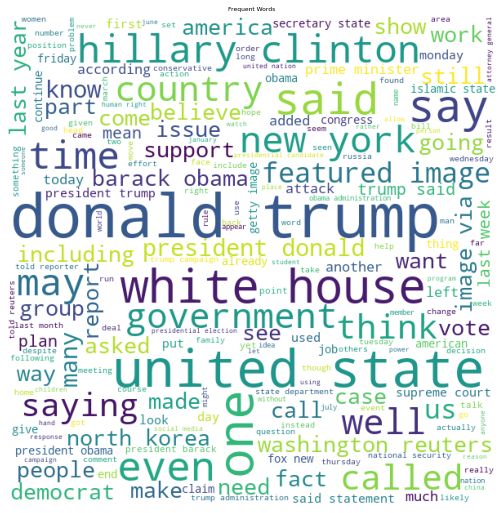

In [15]:
from wordcloud import WordCloud                  #Wordcloud for popularword
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[9, 9])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(data['text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=6);

# Task 1

# Using NLP

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
cv = CountVectorizer(max_df = 0.8, stop_words = stopwords, max_features = 10000, ngram_range = (1,1))
X = cv.fit_transform(preprocessed_text)

In [18]:
tfidf_transformer = TfidfTransformer(smooth_idf = True, use_idf = True)
tfidf_transformer.fit(X)

feature_names = cv.get_feature_names()

In [19]:
def key_extract_nlp(text, num_of_keyword):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([text]))

    from scipy.sparse import coo_matrix
    def sort_coo(coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key = lambda x: (x[1], x[0]), reverse = True)

    def extract_topn_from_vector(feature_names, sorted_items, topn = 10):
        
        #use only topn items from vector
        sorted_items = sorted_items[:topn]

        score_vals = []
        feature_vals = []

        # word index and corresponding tf-idf score
        for idx, score in sorted_items:

            #keep track of feature name and its corresponding score
            score_vals.append(round(score, 3))
            feature_vals.append(feature_names[idx])

        #create a tuples of feature,score
        results = {}
        for idx in range(len(feature_vals)):
            results[feature_vals[idx]] = score_vals[idx]

        return results
    #sort the tf-idf vectors by descending order of scores
    sorted_items = sort_coo(tf_idf_vector.tocoo())
    
    keywords = extract_topn_from_vector(feature_names, sorted_items, num_of_keyword)

    # now print the results
    print("\nAbstract:")
    print(text)
    print("\nKeywords:")
    for k in keywords:
        print(k)

In [20]:
key_extract_nlp(preprocessed_text[7], 5)


Abstract:
addicting info reported new hampshire state representative kyle tasker recently arrested felony drug charges along charges attempted solicit undercover officer believed girl sex enough scandal new hampshire state legislator wmur reports drug dealing tea party representative kept list clients list wound hands police department raid tasker residence earlier month according wmur names elected officials confirmed appear tasker client list rockingham county attorney office state attorney general office involved investigation described scandal potential send shockwaves entire state house friday house speaker shawn jasper called legislators may implicated tasker client list resign immediately saying members legislature take oath uphold constitution laws state member house knowingly committed criminal offense honorable thing step office immediately protect preserve dignity integrity new hampshire house representatives far tasker representative resigned office story wmur via youtube 

# Task 1

# Using BERT

In [21]:
def keyword_extraction_bert(text, n_gram_range, top_keywords):
    # Extract candidate words/phrases
    count = CountVectorizer(ngram_range=n_gram_range, stop_words = stopwords).fit([text])
    candidates = count.get_feature_names()

    model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
    text_embedding = model.encode([text])
    candidate_embeddings = model.encode(candidates)

    distances = cosine_similarity(text_embedding, candidate_embeddings)
    keywords = [candidates[index] for index in distances.argsort()[0][-top_keywords:]]
    print("\nAbstract:")
    print(text)
    print("\nKeywords:")
    for k in keywords:
        print(k)

In [22]:
doc = preprocessed_text[7]
n_gram = (1, 1)
keyword_extraction_bert(doc, n_gram, 5)


Abstract:
addicting info reported new hampshire state representative kyle tasker recently arrested felony drug charges along charges attempted solicit undercover officer believed girl sex enough scandal new hampshire state legislator wmur reports drug dealing tea party representative kept list clients list wound hands police department raid tasker residence earlier month according wmur names elected officials confirmed appear tasker client list rockingham county attorney office state attorney general office involved investigation described scandal potential send shockwaves entire state house friday house speaker shawn jasper called legislators may implicated tasker client list resign immediately saying members legislature take oath uphold constitution laws state member house knowingly committed criminal offense honorable thing step office immediately protect preserve dignity integrity new hampshire house representatives far tasker representative resigned office story wmur via youtube 

# Task 2

# Using Doc2Vec

#  FEATURE EXTRACTION


# FOR UNDERSTANDING THE SEMANTICS FIRST WE NEED TO CONVERT THE GIVEN TEXT INTO VECTORS 

In [23]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [24]:
# download the model and return as object ready for use
model_glove_twitter = api.load("glove-twitter-25")

In [25]:
model_glove_twitter.wv.most_similar("goodluck",topn=10)

<ipython-input-25-f0b85ca66b78>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  model_glove_twitter.wv.most_similar("goodluck",topn=10)


[('luck', 0.8952937722206116),
 ('congrats', 0.8676329851150513),
 ('congratz', 0.8672979474067688),
 ('gudluck', 0.8460711240768433),
 ('thankyou', 0.8394628167152405),
 ('cheers', 0.8344191312789917),
 ('congratulation', 0.8191996812820435),
 ('thanks', 0.8181697130203247),
 ('btw', 0.8043404817581177),
 ('hows', 0.8017550110816956)]

In [26]:
model_glove_twitter.wv.most_similar("sunset",topn=10)

<ipython-input-26-be52440bf354>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  model_glove_twitter.wv.most_similar("sunset",topn=10)


[('sunrise', 0.964740514755249),
 ('venice', 0.8808217644691467),
 ('beach', 0.8753870725631714),
 ('wonderland', 0.8615546226501465),
 ('island', 0.8578473925590515),
 ('rooftop', 0.8566927909851074),
 ('lake', 0.8532638549804688),
 ('hawaii', 0.8503864407539368),
 ('autumn', 0.8491649627685547),
 ('garden', 0.8401645421981812)]

# Glove works only for words for phrases we need to use doc2vec

In [27]:
import gensim.models as g
import codecs

In [28]:
m = g.Doc2Vec.load('doc2vec.bin')

In [29]:
m.wv.vocab

{'tripolitan': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c7c070>,
 'biennials': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c7c0d0>,
 'biysk': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c7cdc0>,
 'woodd': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c858b0>,
 'woode': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85910>,
 'pujyapada': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85610>,
 'verplank': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c859a0>,
 'luanco': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85a00>,
 'woodi': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85a60>,
 'maderista': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85ac0>,
 'sowell': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85b50>,
 'hexecontahedron': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85bb0>,
 'talk.origins': <gensim.models.deprecated.keyedvectors.Vocab at 0x28430c85c40>,

In [30]:
import nltk
from gensim.test.utils import get_tmpfile
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#from nltk import li
test_doc = word_tokenize("justice power long".lower())
test_doc_vector = m.infer_vector(test_doc)

m.most_similar(positive = [test_doc_vector])

[nltk_data] Downloading package punkt to C:\Users\Lucifer
[nltk_data]     MorningStar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-30-9be67c2545af>:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  m.most_similar(positive = [test_doc_vector])


[('general/consulates', 0.6237070560455322),
 ('erythrocercid', 0.6199317574501038),
 ('hyliotid', 0.5925042629241943),
 ('years/death', 0.577953577041626),
 ('theacc.com', 0.5761339664459229),
 ('provisions/elements', 0.5678752660751343),
 ('justice', 0.5599234104156494),
 ('3long', 0.5542463660240173),
 ('auksciausia', 0.5536786913871765),
 ('midi="1"', 0.5460811257362366)]

In [31]:
from scipy import spatial

fisrt_text = 'President of America'
second_text = 'How are you'

vec1 = m.infer_vector(fisrt_text.split())
vec2 = m.infer_vector(second_text.split())
similairty = spatial.distance.cosine(vec1, vec2)

In [32]:
similairty

1.0556925274431705

# Task 2

# Using BERT

# Now using BERT to perform the same task as its more efficient on Sentences and preserving the long value

In [33]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [34]:
sentences = ["I ate dinner.", 
       "We had a three-course meal.", 
       "Brad came to dinner with us.",
       "He loves fish tacos.",
       "In the end, we all felt like we ate too much.",
       "We all agreed; it was a magnificent evening."]

sentence_embeddings = sbert_model.encode(sentences)

In [35]:
query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]

In [36]:
import numpy as np
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [37]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.7173461
Sentence =  We had a three-course meal. ; similarity =  0.63713384
Sentence =  Brad came to dinner with us. ; similarity =  0.58979064
Sentence =  He loves fish tacos. ; similarity =  0.6223936
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.419805
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.18081598


# Phrase-Based Matching 

In [38]:
# Scrapping wikipedia for AI articles
import bs4 as bs  
import urllib.request  
import re  
import nltk

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')  
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:  
    article_text += p.text
    
    
processed_article = article_text.lower()  
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )  
processed_article = re.sub(r'\s+', ' ', processed_article)

In [51]:
# Creating parser

import spacy
nlp = spacy.load('en_core_web_sm-2.3.1')


from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(nlp.vocab)


In [46]:
# Parse List

phrases = ['machine learning', 'robots', 'intelligent agents']

patterns = [nlp(text) for text in phrases]

In [47]:
phrase_matcher.add('Ai', None, *patterns)

In [48]:
sentence = nlp (processed_article)

matched_phrases = phrase_matcher(sentence)

In [49]:
for _, start, end in matched_phrases:
    string_id = nlp.vocab.strings[match_id]  
    span = sentence[start:end]                   
    print(string_id, start, end, span.text)

Ai 28 30 intelligent agents
Ai 270 272 machine learning
Ai 1229 1231 machine learning
Ai 1545 1547 intelligent agents
Ai 3189 3191 intelligent agents
Ai 3348 3350 machine learning
Ai 3862 3863 robots
Ai 5313 5314 robots
Ai 5390 5391 robots
Ai 6499 6500 robots
Ai 6694 6695 robots
Ai 7555 7556 robots
Ai 8938 8939 robots
Ai 9059 9060 robots
Ai 9103 9104 robots
